In [ ]:
!pip install -q qiskit
!pip install -q qiskit_ibm_runtime
!pip install -q qiskit_ibm_provider
!pip install -q pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━

In [ ]:
import qiskit
qiskit.__version__

'1.0.2'

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pylatexenc
import numpy as np
from fractions import Fraction
import random
from math import gcd

In [ ]:
IBMProvider.save_account(token='76354582b826eeab93c726acd32da379dedbea524d8c78c7327f518adcca7d93707144090bb8fe247f1e56d43990425b75e62af1292437e8e1279b665b52ec2a')

In [ ]:
def getQFT(nqbits : int) -> QuantumCircuit:
  circuit = QuantumCircuit(nqbits)

  for cur_qbit in range(nqbits-1 , -1, -1):
    circuit.h(cur_qbit)
    for other_qbit in range(cur_qbit - 1, -1, -1):
      circuit.append(qiskit.circuit.library.CU1Gate(np.pi / (2 ** (cur_qbit - other_qbit))), [cur_qbit, other_qbit])

  for qbit in range(nqbits // 2):
    circuit.append(qiskit.circuit.library.SwapGate(), [qbit, nqbits - qbit - 1])

  return circuit

def getIQFT(nqbits : int) -> QuantumCircuit:
  circuit = QuantumCircuit(nqbits)

  for qbit in range(nqbits // 2):
    circuit.append(qiskit.circuit.library.SwapGate(), [nqbits - qbit - 1, qbit])

  for cur_qbit in range(nqbits):
    for other_qbit in range(cur_qbit+1, nqbits):
      circuit.append(qiskit.circuit.library.CU1Gate(-np.pi / float(2 ** (other_qbit - cur_qbit))), [other_qbit, cur_qbit])
    circuit.h(cur_qbit)

  return circuit

def applyQFT(qCircuit : QuantumCircuit, nqbits : int) -> None:
  for cur_qbit in range(nqbits-1, -1, -1):
    circuit.h(cur_qbit)
    for other_qbit in range(cur_qbit - 1, -1, -1):
      circuit.append(qiskit.circuit.library.CU1Gate(np.pi / (2 ** (cur_qbit - other_qbit))), [cur_qbit, other_qbit])

  for qbit in range(nqbits // 2):
    circuit.append(qiskit.circuit.library.SwapGate(), [qbit, nqbits - qbit - 1])

def applyIQFT(qCircuit : QuantumCircuit, nqbits : int) -> None:
  for qbit in range(nqbits // 2):
    qCircuit.append(qiskit.circuit.library.SwapGate(), [qbit, nqbits - qbit - 1])

  for cur_qbit in range(nqbits):
    qCircuit.h(cur_qbit)
    for other_qbit in range(cur_qbit+1, nqbits):
      qCircuit.append(qiskit.circuit.library.CU1Gate(-np.pi / (2 ** (other_qbit - cur_qbit))), [other_qbit, cur_qbit])

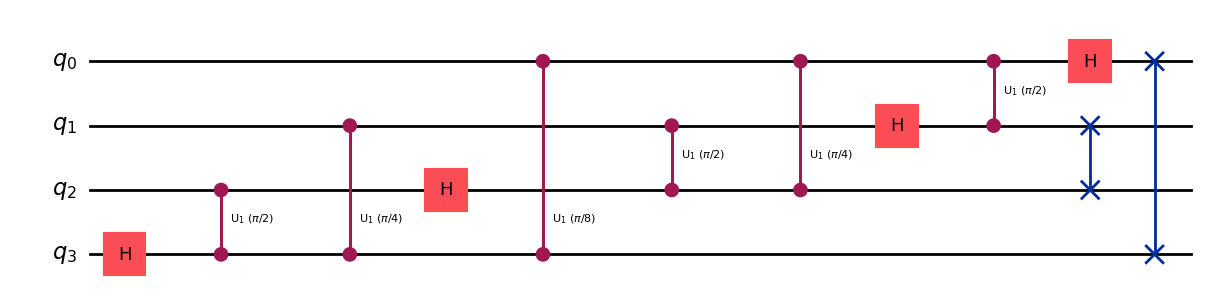

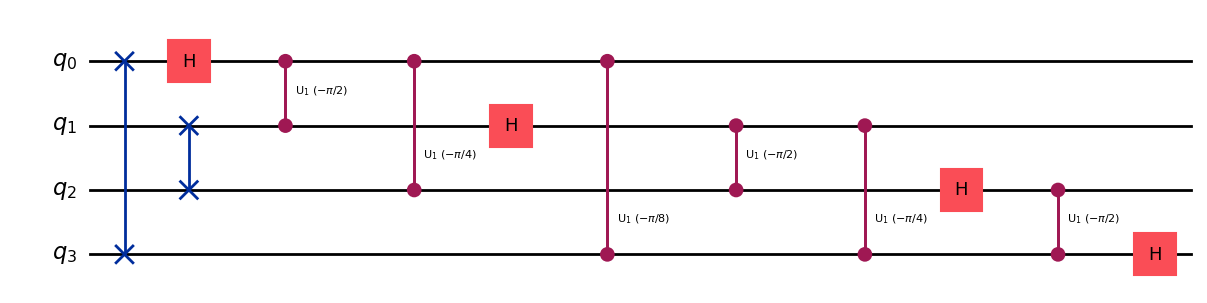

In [ ]:
qbits = 4

qft_circuit = getQFT(qbits)
iqft_circuit = getIQFT(qbits)

display(qft_circuit.draw(output='mpl'))
display(iqft_circuit.draw(output='mpl'))

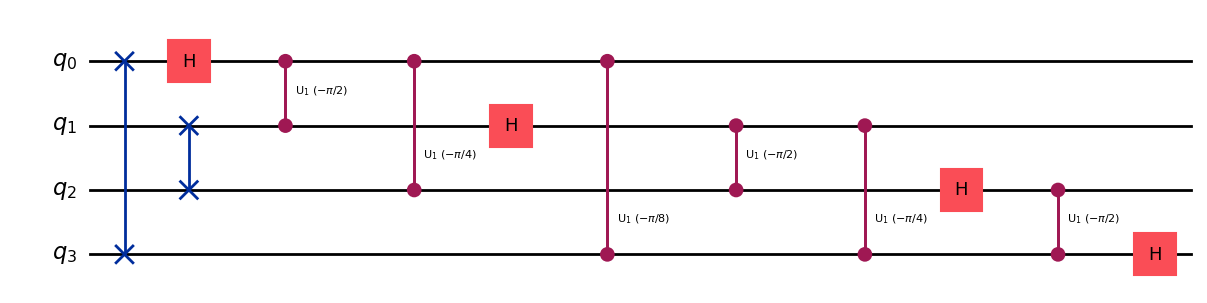

In [ ]:
qbits = 4

circuit = QuantumCircuit(qbits)
applyIQFT(circuit, qbits)

display(circuit.draw(output='mpl'))

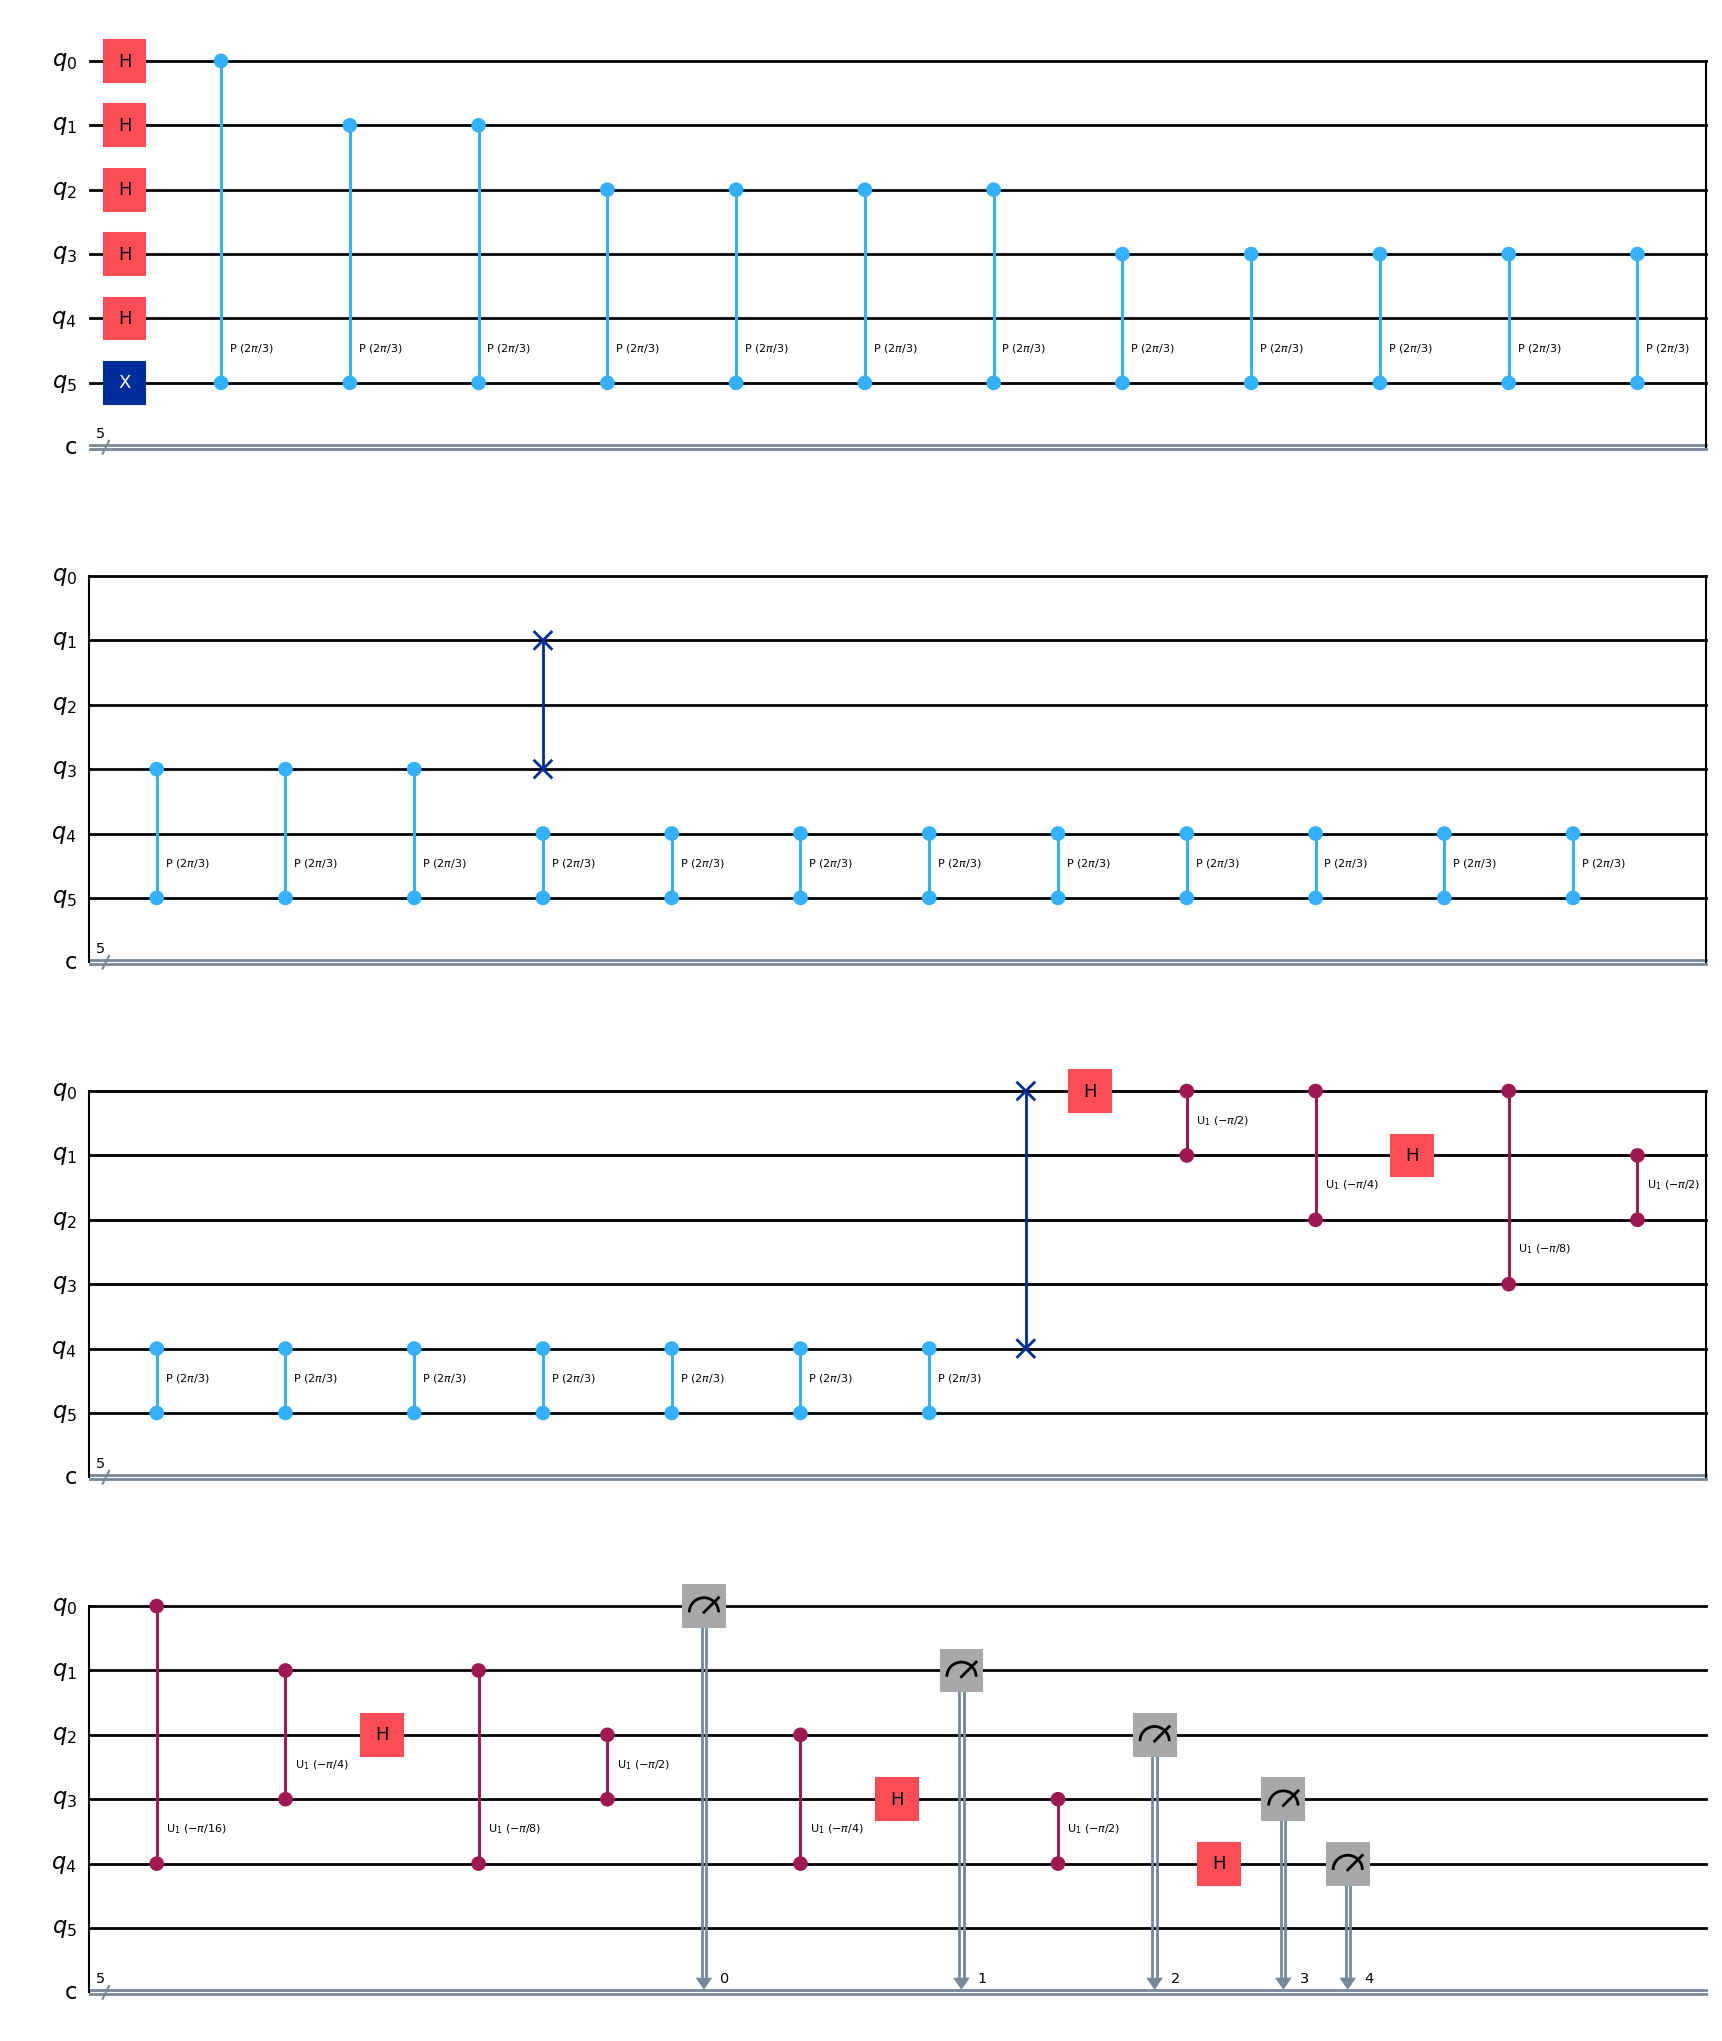

In [ ]:
bits = 5

circuit = QuantumCircuit(bits + 1, bits)

for qbit in range(bits):
  circuit.h(qbit)

circuit.x(bits)

phase = 2 * np.pi / 3
rep = 1

for iter_qbit in range(bits):
  for i in range(rep):
    circuit.cp(phase, iter_qbit, bits)
  rep *= 2

applyIQFT(circuit, bits)

for i in range(bits):
  circuit.measure(i, i)

display(circuit.draw(output='mpl'))

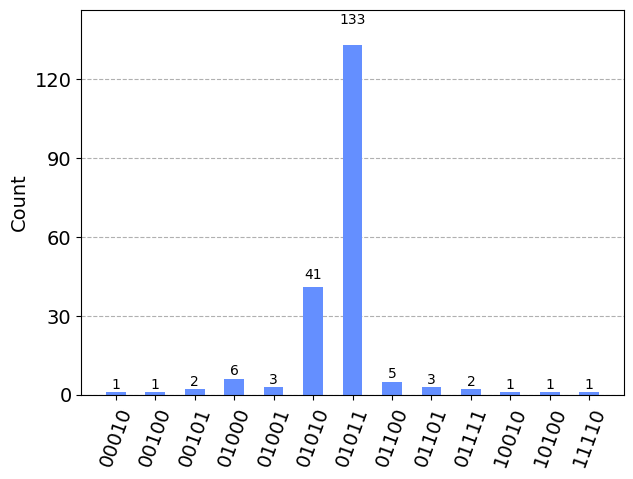

In [ ]:
provider = IBMProvider()
backend = provider.get_backend("ibmq_qasm_simulator")

shots = 200

transCircuit = qiskit.transpile(circuit, backend, optimization_level=3)
job = backend.run(transCircuit, shots=shots)
result = job.result()
count = result.get_counts(circuit)

display(plot_histogram(count))

In [ ]:
def bin2dec(n : str) -> int:
  result = 0
  for i, bit in enumerate(n):
    result += int(bit) * (2 ** i)
  return result

max_binary_item = 0
max_binary_key = ''
sum = 0

for key, item in count.items():
  sum += item
  if item > max_binary_item:
    max_binary_item = item
    max_binary_key = key

estimated_phase = bin2dec(max_binary_key)
phase_accuracy_window = 2 ** -(len(max_binary_key))

print("Estimated Phase : {}, Phase Accucary Window : {}".format(estimated_phase, phase_accuracy_window))

Estimated Phase : 26, Phase Accucary Window : 0.03125


In [ ]:
# Iterate through power of 2 in possible bit range
# Extra states will be N - 2^k

# For 21, N = 2^5(L), 2^k belongs {2, 4, 8, 16}
# Extra states {19, 17, 13, 5} (Apply X gate for extra gates!) -> (Reverses them back to 2^k)
# Hence, Total States => (L-1)*2

def c_amodN(a, pow, N):
  qbits = N.bit_length()
  comp_states = [2 ** i for i in range(1, qbits)]
  extra_states = [N - qbit for qbit in comp_states]

  if (a not in comp_states) and (a not in extra_states): raise ValueError("Invalid State!")

  U = QuantumCircuit(qbits)
  for _ in range(pow):
    for qbit in range(qbits-1):
      if (a == comp_states[qbit]) or (a == extra_states[qbit]):
        work_bit = comp_states[qbit].bit_length() - 1
        if comp_states[qbit] > extra_states[qbit]:
          # Right Shift Operation
          print("For a in [{}, {}]".format(comp_states[qbit], extra_states[qbit]))
          bit1 = 0
          bit2 = 1
          while(bit2 < qbits):
            U.swap(bit1, bit2)
            print("Applied U.swap({}, {}) in Right Shift!".format(bit1, bit2))
            bit1 += 1
            bit2 += 1
        else:
          bit2 = qbits - 1
          bit1 = bit2 - work_bit
          while(bit1 >= 0):
            U.swap(bit1, bit2)
            print("Applied U.swap({}, {}) in Left Shift!".format(bit1, bit2))
            bit1 -= 1
            bit2 -= 1

    if a in extra_states:
      for qbit in range(qbits): U.append(qiskit.circuit.library.XGate(), [qbit])

  U = U.to_gate()
  U.name = "{}^{} mod {}".format(a, pow, N)
  U = U.control()

  print("Qbits : {}".format(qbits))
  print("Compulsary States : {}".format(comp_states))
  print("Extra States : {}".format(extra_states))

  return U

In [ ]:
def a2jmodN(a, j, N):
  for _ in range(j): a = np.mod(a**2, N)
  return a

In [ ]:
def qpe_amodN(a, N):
  N_COUNT = N.bit_length() * 2
  provider = IBMProvider()
  backend = provider.get_backend("ibmq_qasm_simulator")

  circuit = QuantumCircuit(N_COUNT+N.bit_length(), N_COUNT)
  for q in range(N_COUNT): circuit.h(q)

  circuit.x(N_COUNT)

  for q in range(N_COUNT):
    circuit_amodN = c_amodN(a, 2**q, N)
    circuit.append(circuit_amodN, [q]+[N_COUNT+i for i in range(N.bit_length())])

  qftDagger = getIQFT(N_COUNT)

  circuit.append(qftDagger, list(range(N_COUNT)))
  circuit.measure(range(N_COUNT), range(N_COUNT))

  job = backend.run(qiskit.transpile(circuit, backend), shots=1, memory=True)
  readings = job.result().get_memory()
  phase = int(readings[0],2)/(2**N_COUNT)

  print("Register Readings : {}".format(readings[0]))
  print("Corresponding Phase : {}".format(phase))

  return phase

In [ ]:
N = 15
FACTOR_FOUND = False
count = 0

while(not FACTOR_FOUND):
  count += 1
  a = random.randint(2, N)
  print("Attemp : {}".format(count))
  print("Running for Random Integer = {}".format(a))

  try:
    phase = qpe_amodN(a, N)
  except ValueError:
    print("Bad Guess! Random Integer not in fundamental or dervived states!")
    continue

  result = Fraction(phase).limit_denominator(N)
  z, r = result.numerator, result.denominator

  print("Estimated Period : {}".format(r))

  if phase != 0:
    p, q = gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)
    print("Estimated Factors : {}, {}".format(p, q))

    if (p not in [1, N] and (N%p) == 0) and (q not in [1, N] and (N%q) == 0):
      print("{} and {} are Non-Trivial Factor!".format(min(p, q), max(p, q)))
      FACTOR_FOUND = True

    else:
      print("{} and {} are Trivial Factors".format(min(p, q), max(p, q)))

Attemp : 1
Running for Random Integer = 10
Bad Guess! Random Integer not in fundamental or dervived states!
Attemp : 2
Running for Random Integer = 2
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Qbits : 4
Compulsary States : [2, 4, 8]
Extra States : [13, 11, 7]
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Qbits : 4
Compulsary States : [2, 4, 8]
Extra States : [13, 11, 7]
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shift!
Applied U.swap(0, 1) in Left Shift!
Applied U.swap(2, 3) in Left Shift!
Applied U.swap(1, 2) in Left Shi